In [1]:
from PyFile.tools_fit import negll_lognormal, logistic_ls, negll_lognormal_compete, negll_full
import ipywidgets as ipy
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import minimize, fsolve
from scipy.integrate import odeint
from functools import partial
from PyFile.fit_system_LotkaVoltera import LV_compete, LV_mono, LV_compete_eq_coexist, get_competition_coefficient, LV_mono1, LV_compete1, get_compete_slope, Her_jac

In [2]:
method = 'Nelder-Mead'

# Read data

## Monoculture low CO2

In [3]:
mono_lowC = pd.read_csv("Data/Mono_lowCO2.csv")
mono_lowC['day'] = round(mono_lowC.day_raw)
mono_lowC['poplog'] = np.log(mono_lowC.dens)
micro_lowC = pd.read_csv("Data/Micro_lowCO2.csv")
micro_lowC['day'] = round(micro_lowC.day_raw)
micro_lowC['poplog'] = np.log(micro_lowC.dens)
scene_lowC = pd.read_csv("Data/Scen_lowCO2.csv")
scene_lowC['day'] = round(scene_lowC.day_raw)
scene_lowC['poplog'] = np.log(scene_lowC.dens)
chlo_lowC = pd.read_csv("Data/Chlo_lowCO2.csv")
chlo_lowC['day'] = round(chlo_lowC.day_raw)
chlo_lowC['poplog'] = np.log(chlo_lowC.dens)

## Coculture low CO2

In [4]:
mimo_lowC = pd.read_csv('Data/micromono_lowCO2.csv')
misce_lowC = pd.read_csv('Data/misce_lowCO2.csv')
michlo_lowC = pd.read_csv('Data/miclo_lowCO2.csv')
mimo_lowC['day'] = round(mimo_lowC.day_raw)
mimo_lowC['poplog_0'] = np.log(mimo_lowC.dens_0)
mimo_lowC['poplog_1'] = np.log(mimo_lowC.dens_1)
misce_lowC['day'] = round(misce_lowC.day_raw)
misce_lowC['poplog_0'] = np.log(misce_lowC.dens_0)
misce_lowC['poplog_1'] = np.log(misce_lowC.dens_1)
michlo_lowC['day'] = round(michlo_lowC.day_raw)
michlo_lowC['poplog_0'] = np.log(michlo_lowC.dens_0)
michlo_lowC['poplog_1'] = np.log(michlo_lowC.dens_1)

## Monoculture high CO2

In [5]:
mono_highC = pd.read_csv('Data/Mono_highCO2.csv')
mono_highC['day'] = round(mono_highC.day_raw)
mono_highC['poplog'] = np.log(mono_highC.dens)
micro_highC = pd.read_csv('Data/Micro_highCO2.csv')
micro_highC['poplog'] = np.log(micro_highC.dens)
micro_highC['day'] = round(micro_highC.day_raw)
scene_highC = pd.read_csv('Data/Scen_highCO2.csv')
scene_highC['day'] = round(scene_highC.day_raw)
scene_highC['poplog'] = np.log(scene_highC.dens)
chlo_highC = pd.read_csv('Data/Chlo_highCO2.csv')
chlo_highC['day'] = round(chlo_highC.day_raw)
chlo_highC['poplog'] = np.log(chlo_highC.dens)

## Coculture high CO2

In [6]:
mimo_highC = pd.read_csv('Data/micromono_highCO2.csv')
mimo_highC['day'] = round(mimo_highC.day_raw)
mimo_highC['poplog_0'] = np.log(mimo_highC.dens_0)
mimo_highC['poplog_1'] = np.log(mimo_highC.dens_1)
miscene_highC = pd.read_csv('Data/miscene_highCO2.csv')
miscene_highC['day'] = round(miscene_highC.day_raw)
miscene_highC['poplog_0'] = np.log(miscene_highC.dens_0)
miscene_highC['poplog_1'] = np.log(miscene_highC.dens_1)
michlo_highC = pd.read_csv('Data/microchlo_highCO2.csv')
michlo_highC['poplog_0'] = np.log(michlo_highC.dens_0)
michlo_highC['poplog_1'] = np.log(michlo_highC.dens_1)
michlo_highC['day'] = round(michlo_highC.day_raw)

# Fitting procedure

Fitting data to the Lotka-Voltera model of pairwise competition between Microcystis and three other green algae

\begin{align}
\frac{dN_1}{dt} = r_1 \left(1 - \frac{N_1}{K_1} - \alpha \frac{N_2}{K_1} \right) N_1 \\
\frac{dN_1}{dt} = r_2 \left(1 - \frac{N_2}{K_2} - \beta \frac{N_1}{K_2} \right) N_2
\end{align}

$r_1, r_2$: percapital intrinsic growth rate of Mycrosistis and green algae

$K_1, K_2$: carrying capacity of Microsistis and green algae when growing in monoculture

$\alpha$ : per capital effect of green algae on Microcystis

$\beta$: per capital effect of Microcystis on green algae

In the following graph, markers indicate real data and solid lines indicate predicted data from the model

## Microcystis and Monoraphidium

In [7]:
bnds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (None, None), (None, None))

init = (0.10686526134849561, 0.3170274831857972, 350.90204758373505, 
        0.08392665236032218, 340.32587556502756, 0.44106919451113424, 1.1119967487272162) 
mimo_lC_est = minimize(negll_full, init, args=((LV_mono, LV_compete, micro_lowC, mono_lowC, mimo_lowC),), 
                method=method, bounds=bnds)

In [8]:
bnds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (None, None), (None, None))
init = (0.0928994072198372, 0.5699796403992011, 1863.8796530334869, 
        0.5797892803413298, 1968.722523498028, 0.941053197348246, 0.3967112021814535) #init sure
mimo_hC_est = minimize(negll_full, init, args=((LV_mono, LV_compete, micro_highC, mono_highC, mimo_highC),), 
                method=method, bounds=bnds)

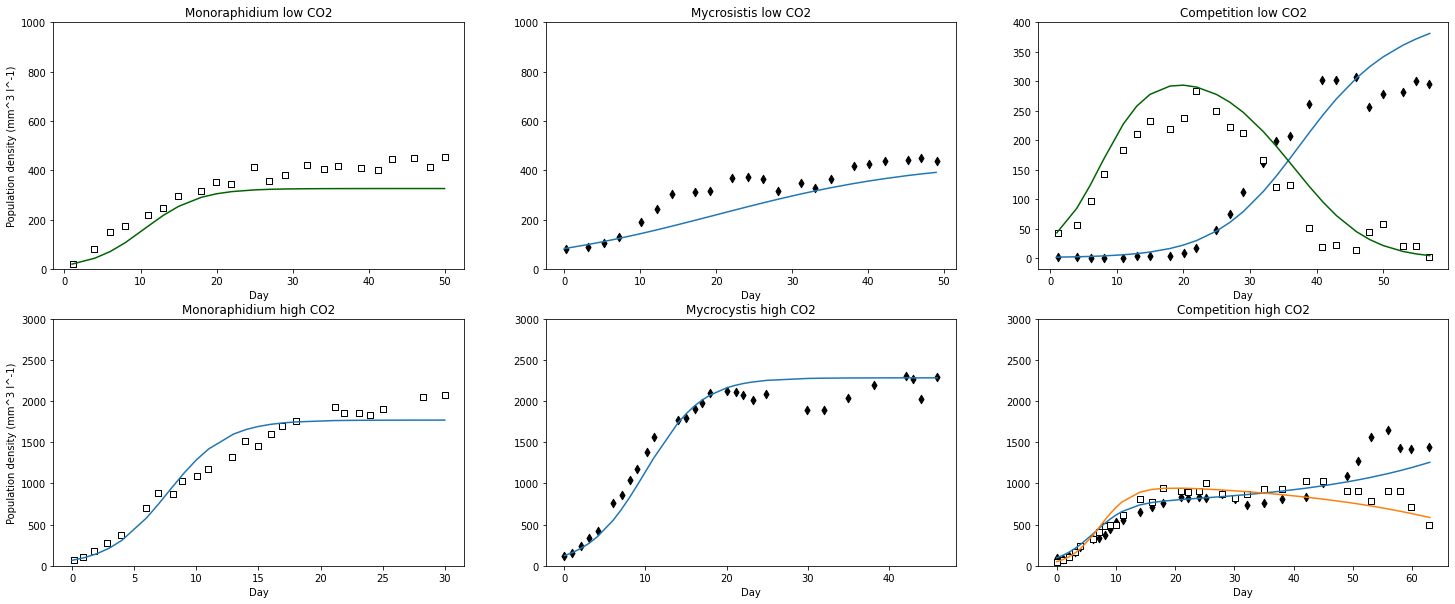

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes[0, 0].scatter(mono_lowC.day_raw, mono_lowC.dens, marker='s', c='white', edgecolors='k', label='Monoraphidium')
trj = odeint(LV_mono, mono_lowC.dens[0], mono_lowC.day, args=((mimo_lC_est.x[3], mimo_lC_est.x[4]),))
axes[0, 0].plot(mono_lowC.day, trj, c='darkgreen')
axes[0, 0].set_ylim(0, 1000)
axes[0, 1].scatter(micro_lowC.day_raw, micro_lowC.dens, marker='d', c='k', label='Mycrocystis')
trj = odeint(LV_mono, micro_lowC.dens[0], micro_lowC.day, args=((mimo_lC_est.x[1], mimo_lC_est.x[2]),))
axes[0, 1].plot(micro_lowC.day, trj)
axes[0, 1].set_ylim(0, 1000)
trj = odeint(LV_compete, (mimo_lowC.dens_0[0], mimo_lowC.dens_1[0]), mimo_lowC.day, args=(mimo_lC_est.x[1::],))
axes[0, 2].plot(mimo_lowC.day, trj[:, 0])
axes[0, 2].plot(mimo_lowC.day, trj[:, 1], c='darkgreen')
axes[0, 2].scatter(mimo_lowC.day_raw, mimo_lowC.dens_0, marker='d', c='k')
axes[0, 2].scatter(mimo_lowC.day_raw, mimo_lowC.dens_1, marker='s', c='white', edgecolors='k')

axes[1, 0].scatter(mono_highC.day_raw, mono_highC.dens, c='white', marker='s', edgecolor='k')
trj = odeint(LV_mono, mono_highC.dens[0], mono_highC.day, args=((mimo_hC_est.x[3], mimo_hC_est.x[4]),))
axes[1, 0].plot(mono_highC.day, trj)
axes[1, 1].scatter(micro_highC.day_raw, micro_highC.dens, marker='d', c='k')
trj = odeint(LV_mono, micro_highC.dens[0], micro_highC.day, args=((mimo_hC_est.x[1], mimo_hC_est.x[2]), ))
axes[1, 1].plot(micro_highC.day, trj)
axes[1, 2].scatter(mimo_highC.day_raw, mimo_highC.dens_0, marker='d', c='k')
axes[1, 2].scatter(mimo_highC.day_raw, mimo_highC.dens_1, c='white', marker='s', edgecolors='k')
trj = odeint(LV_compete, (mimo_highC.dens_0[0], mimo_highC.dens_1[0]), mimo_highC.day, args=(mimo_hC_est.x[1::],))
axes[1, 2].plot(mimo_highC.day, trj)
axes[1, 0].set_ylim(0, 3000)
axes[1, 1].set_ylim(0, 3000)
axes[1, 2].set_ylim(0, 3000)
axes[0, 0].set_ylabel('Population density (mm^3 l^-1)')
axes[1, 0].set_ylabel('Population density (mm^3 l^-1)')
list_title = ['Monoraphidium low CO2', 'Mycrosistis low CO2', 'Competition low CO2', 
                'Monoraphidium high CO2', 'Mycrocystis high CO2', 'Competition high CO2']
for ax, title in zip(plt.flatten(axes), list_title):
    ax.set_title(title)
    ax.set_xlabel('Day')

## Microcystis and Scenedesmus

In [10]:
bnds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (None, None), (None, None))
init = (0.10789377516329327, 0.38982674557939906, 396.5422799362023, 
        0.3296514938078497, 758.4494322120552, 0.462468582011176, -0.007973810578293383) #init sure microsoft
misce_lC_est = minimize(negll_full, init, args=((LV_mono, LV_compete, micro_lowC, scene_lowC, misce_lowC),), 
                method=method, bounds=bnds)

In [11]:
bnds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (None, None), (None, None))
init = (0.09876230070937711, 0.4937742898825821, 2465.7550640317854, 
        0.628846920579764, 2444.0559680750466, -0.24210107271513157, 0.42719459406163607)
misce_hC_est = minimize(negll_full, init, args=((LV_mono, LV_compete, micro_highC, scene_highC, miscene_highC),), 
                method=method, bounds=bnds)

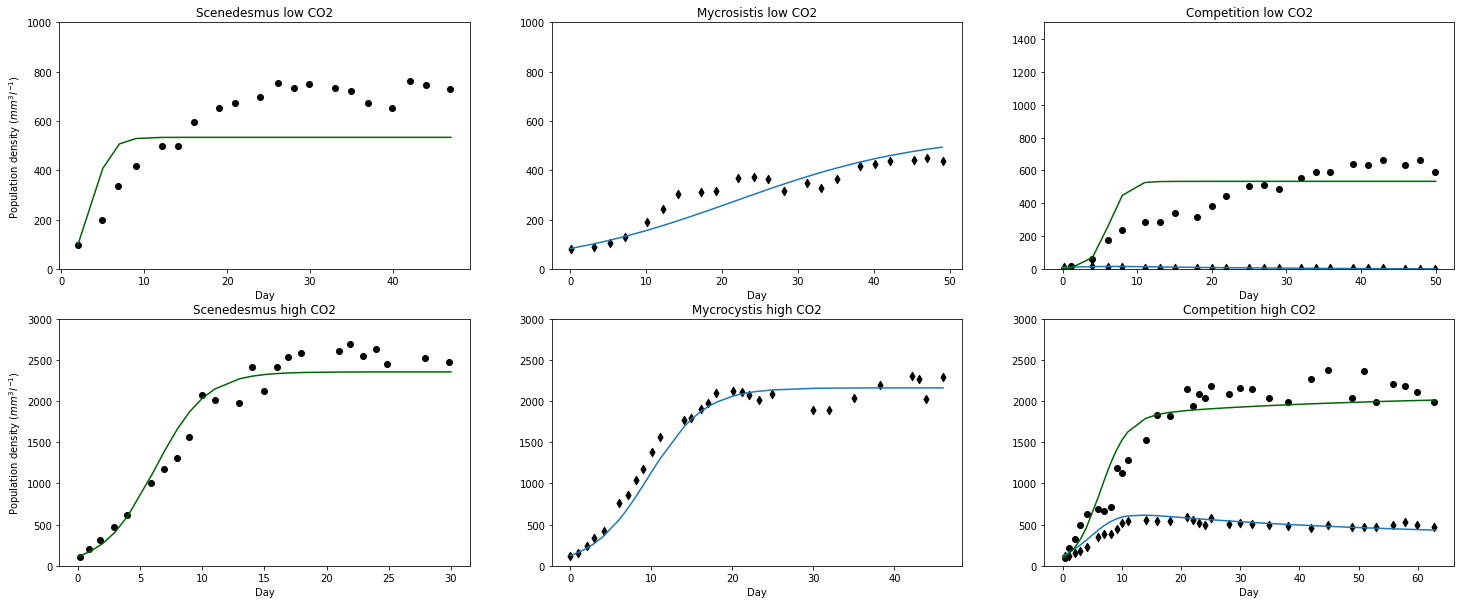

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes[0, 0].scatter(scene_lowC.day_raw, scene_lowC.dens, c='k')
trj = odeint(LV_mono, scene_lowC.dens[0], scene_lowC.day, args=((misce_lC_est.x[3], misce_lC_est.x[4]),))
axes[0, 0].plot(scene_lowC.day, trj, c='darkgreen')
axes[0, 1].scatter(micro_lowC.day_raw, micro_lowC.dens, marker='d', c='k')
trj = odeint(LV_mono, micro_lowC.dens[0], micro_lowC.day, args=((misce_lC_est.x[1], misce_lC_est.x[2]), ))
axes[0, 1].plot(micro_lowC.day, trj)
axes[0, 2].scatter(misce_lowC.day_raw, misce_lowC.dens_0, marker='d', c='k')
axes[0, 2].scatter(misce_lowC.day_raw, misce_lowC.dens_1, c='k')
trj = odeint(LV_compete, (misce_lowC.dens_0[0], misce_lowC.dens_1[0]), misce_lowC.day, args=(misce_lC_est.x[1::],))
axes[0, 2].plot(misce_lowC.day, trj[:, 0])
axes[0, 2].plot(misce_lowC.day, trj[:, 1], c='darkgreen')
axes[0, 0].set_ylim(0, 1000)
axes[0, 1].set_ylim(0, 1000)
axes[0, 2].set_ylim(0, 1500)

axes[1, 0].scatter(scene_highC.day_raw, scene_highC.dens, c='k')
trj = odeint(LV_mono, scene_highC.dens[0], scene_highC.day, args=((misce_hC_est.x[3], misce_hC_est.x[4]),))
axes[1, 0].plot(scene_highC.day, trj, c='darkgreen')
axes[1, 1].scatter(micro_highC.day_raw, micro_highC.dens, marker='d', c='k')
trj = odeint(LV_mono, micro_highC.dens[0], micro_highC.day, args=((misce_hC_est.x[1], misce_hC_est.x[2]), ))
axes[1, 1].plot(micro_highC.day, trj)
axes[1, 2].scatter(miscene_highC.day_raw, miscene_highC.dens_0, marker='d', c='k')
axes[1, 2].scatter(miscene_highC.day_raw, miscene_highC.dens_1, c='k')
trj = odeint(LV_compete, (miscene_highC.dens_0[0], miscene_highC.dens_1[0]), miscene_highC.day, args=(misce_hC_est.x[1::],))
axes[1, 2].plot(miscene_highC.day, trj[:, 0])
axes[1, 2].plot(miscene_highC.day, trj[:, 1], c='darkgreen')
axes[1, 0].set_ylim(0, 3000)
axes[1, 1].set_ylim(0, 3000)
axes[1, 2].set_ylim(0, 3000)
axes[0, 0].set_ylabel(r'Population density $(mm^3 l^{-1})$')
axes[1, 0].set_ylabel(r'Population density $(mm^3 l^{-1})$')
list_title = ['Scenedesmus low CO2', 'Mycrosistis low CO2', 'Competition low CO2', 
                'Scenedesmus high CO2', 'Mycrocystis high CO2', 'Competition high CO2']
for ax, title in zip(plt.flatten(axes), list_title):
    ax.set_title(title)
    ax.set_xlabel('Day')

## Microcystis and chlorella

In [13]:
bnds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (None, None), (None, None))
init = (0.08973291721515722, 0.11860046529683263, 566.1668403726435, 
        0.505403734726263, 299.15159047693163, -0.13046636000149384, 0.48517473339235256) #init sure
michlo_lC_est = minimize(negll_full, init, args=((LV_mono, LV_compete, micro_lowC, chlo_lowC, michlo_lowC),), 
                                method=method, bounds=bnds)

In [14]:
bnds = ((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None), (None, None), (None, None))
init = (0.09774378255411864, 0.6012682667558884, 1990.3718939242767,
        0.5450064837784077, 2487.893035114803, -1.23675131848783, 1.2361558577433118) #init sure
michlo_hC_est = minimize(negll_full, init, args=((LV_mono, LV_compete, micro_highC, chlo_highC, michlo_highC),), 
                method=method, bounds=bnds)

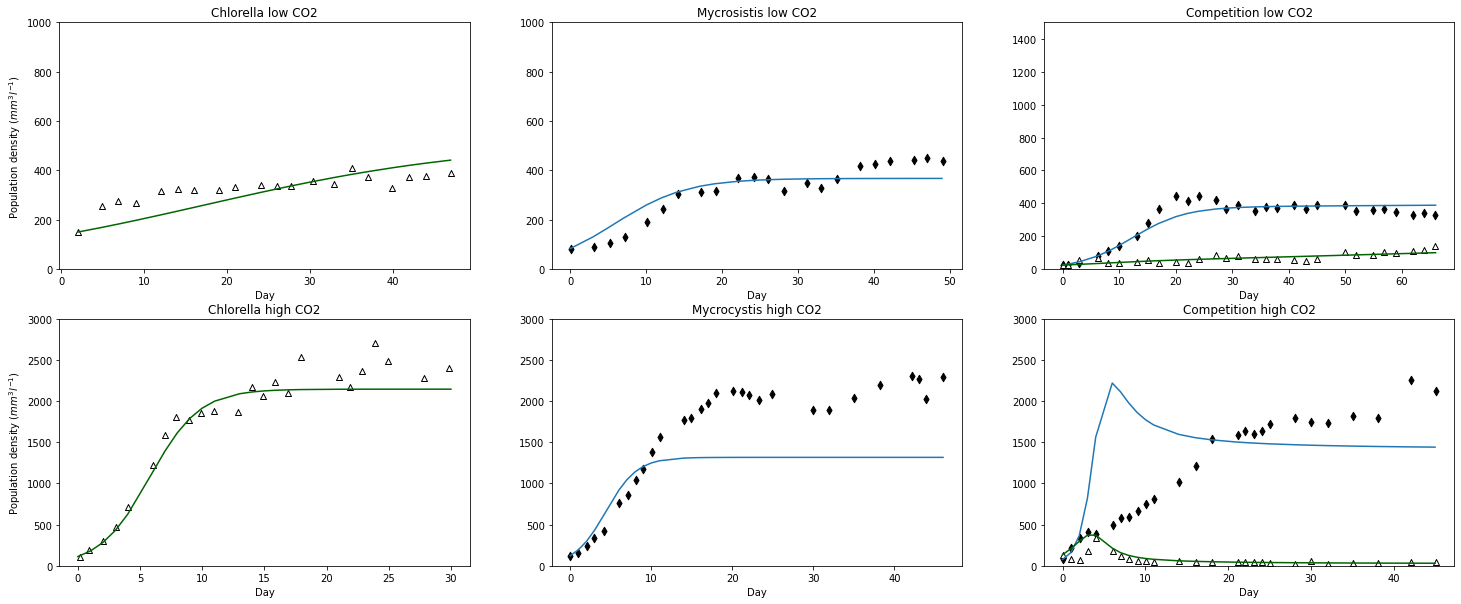

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes[0, 0].scatter(chlo_lowC.day_raw, chlo_lowC.dens, c='white', marker='^', edgecolor='k')
trj = odeint(LV_mono, chlo_lowC.dens[0], chlo_lowC.day, args=((michlo_lC_est.x[3], michlo_lC_est.x[4]),))
axes[0, 0].plot(chlo_lowC.day, trj, c='darkgreen')
axes[0, 1].scatter(micro_lowC.day_raw, micro_lowC.dens, marker='d', c='k')
trj = odeint(LV_mono, micro_lowC.dens[0], micro_lowC.day, args=((michlo_lC_est.x[1], michlo_lC_est.x[2]), ))
axes[0, 1].plot(micro_lowC.day, trj)
axes[0, 2].scatter(michlo_lowC.day_raw, michlo_lowC.dens_0, marker='d', c='k')
axes[0, 2].scatter(michlo_lowC.day_raw, michlo_lowC.dens_1, c='white', marker='^', edgecolors='k')
trj = odeint(LV_compete, (michlo_lowC.dens_0[0], michlo_lowC.dens_1[0]), michlo_lowC.day, args=(michlo_lC_est.x[1::],))
axes[0, 2].plot(michlo_lowC.day, trj[:, 0])
axes[0, 2].plot(michlo_lowC.day, trj[:, 1], c='darkgreen')
axes[0, 0].set_ylim(0, 1000)
axes[0, 1].set_ylim(0, 1000)
axes[0, 2].set_ylim(0, 1500)

axes[1, 0].scatter(chlo_highC.day_raw, chlo_highC.dens, c='white', marker='^', edgecolors='k')
trj = odeint(LV_mono, chlo_highC.dens[0], chlo_highC.day, args=((michlo_hC_est.x[3], michlo_hC_est.x[4]),))
axes[1, 0].plot(chlo_highC.day, trj, c='darkgreen')
axes[1, 1].scatter(micro_highC.day_raw, micro_highC.dens, marker='d', c='k')
trj = odeint(LV_mono, micro_highC.dens[0], micro_highC.day, args=((michlo_hC_est.x[1], michlo_hC_est.x[2]), ))
axes[1, 1].plot(micro_highC.day, trj)
axes[1, 2].scatter(michlo_highC.day_raw, michlo_highC.dens_0, marker='d', c='k')
axes[1, 2].scatter(michlo_highC.day_raw, michlo_highC.dens_1, c='white', marker='^', edgecolors='k')
trj = odeint(LV_compete, (michlo_highC.dens_0[0], michlo_highC.dens_1[0]), michlo_highC.day, args=(michlo_hC_est.x[1::],))
axes[1, 2].plot(michlo_highC.day, trj[:, 0])
axes[1, 2].plot(michlo_highC.day, trj[:, 1], c='darkgreen')
axes[1, 0].set_ylim(0, 3000)
axes[1, 1].set_ylim(0, 3000)
axes[1, 2].set_ylim(0, 3000)
axes[0, 0].set_ylabel(r'Population density $(mm^3 l^{-1})$')
axes[1, 0].set_ylabel(r'Population density $(mm^3 l^{-1})$')
list_title = ['Chlorella low CO2', 'Mycrosistis low CO2', 'Competition low CO2', 
                'Chlorella high CO2', 'Mycrocystis high CO2', 'Competition high CO2']
for ax, title in zip(plt.flatten(axes), list_title):
    ax.set_title(title)
    ax.set_xlabel('Day')

## Converting to growth and competition

In [16]:
r_micro1_lC, a_micro1_lC, r_mono_lC, a_mono_lC, a_mimo_lC, b_mimo_lC = get_competition_coefficient(mimo_lC_est)
r_micro2_lC, a_micro2_lC, r_scene_lC, a_scene_lC, a_misce_lC, b_misce_lC = get_competition_coefficient(misce_lC_est)
r_micro3_lC, a_micro3_lC, r_chlo_lC, a_chlo_lC, a_michlo_lC, b_michlo_lC = get_competition_coefficient(michlo_lC_est)

r_micro1_hC, a_micro1_hC, r_mono_hC, a_mono_hC, a_mimo_hC, b_mimo_hC = get_competition_coefficient(mimo_hC_est)
r_micro2_hC, a_micro2_hC, r_scene_hC, a_scene_hC, a_misce_hC, b_misce_hC = get_competition_coefficient(misce_hC_est)
r_micro3_hC, a_micro3_hC, r_chlo_hC, a_chlo_hC, a_michlo_hC, b_michlo_hC = get_competition_coefficient(michlo_hC_est)

sl_mimo_lC = get_compete_slope(mimo_lC_est)
sl_mimo_hC = get_compete_slope(mimo_hC_est)
sl_misce_lC = get_compete_slope(misce_lC_est)
sl_misce_hC = get_compete_slope(misce_hC_est)
sl_michlo_lC = get_compete_slope(michlo_lC_est)
sl_michlo_hC = get_compete_slope(michlo_hC_est)

## Assert

In [17]:
time = np.linspace(0, 2000, 1000)
trj = odeint(LV_compete, (mimo_lowC.dens_0[0], mimo_lowC.dens_1[0]), time, args=(mimo_lC_est.x[1::],))
trj_test = odeint(LV_compete1, (mimo_lowC.dens_0[0], mimo_lowC.dens_1[0]), time,
                  args=((r_micro1_lC, a_micro1_lC, r_mono_lC, a_mono_lC, a_mimo_lC, b_mimo_lC), ))
assert np.isclose(trj[-1], trj_test[-1]).all()
trj = odeint(LV_compete, (mimo_highC.dens_0[0], mimo_highC.dens_1[0]), time, args=(mimo_hC_est.x[1::],))
trj_test = odeint(LV_compete1, (mimo_highC.dens_0[0], mimo_highC.dens_1[0]), time,
                args=((r_micro1_hC, a_micro1_hC, r_mono_hC, a_mono_hC, a_mimo_hC, b_mimo_hC), ))
assert np.isclose(trj[-1], trj_test[-1]).all()
trj = odeint(LV_compete, (misce_lowC.dens_0[0], misce_lowC.dens_1[0]), time, args=(misce_lC_est.x[1::],))
trj_test = odeint(LV_compete1,(misce_lowC.dens_0[0], misce_lowC.dens_1[0]), time,
                  args=((r_micro2_lC, a_micro2_lC, r_scene_lC, a_scene_lC, a_misce_lC, b_misce_lC), ))
assert np.isclose(trj[-1], trj_test[-1]).all()
trj = odeint(LV_compete, (michlo_lowC.dens_0[0], michlo_lowC.dens_1[0]), time, args=(michlo_lC_est.x[1::],))
trj_test = odeint(LV_compete1, (michlo_lowC.dens_0[0], michlo_lowC.dens_1[0]), time,
                args=((r_micro3_lC, a_micro3_lC, r_chlo_lC, a_chlo_lC, a_michlo_lC, b_michlo_lC), ))
assert np.isclose(trj[-1], trj_test[-1]).all()


# Structural approach

### Graph 1: Feasible domain and status of Microcystis and green algae at different CO2 levels

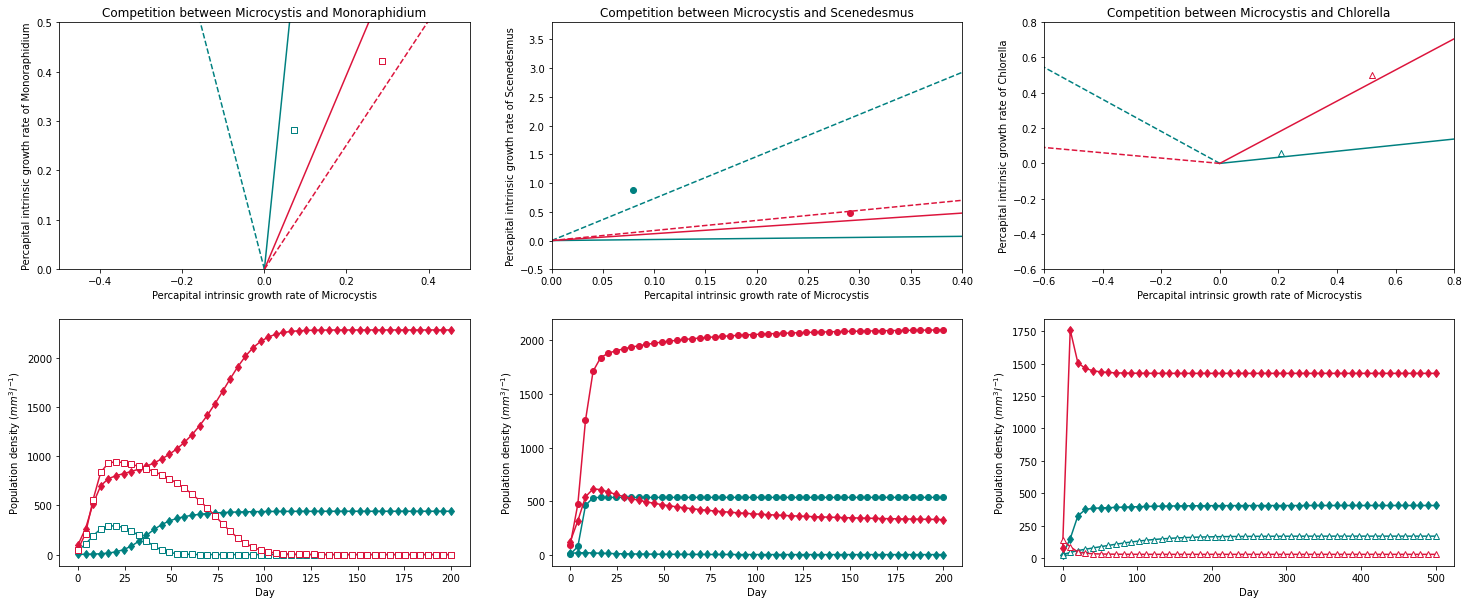

In [30]:
lowC, highC = 'teal', 'crimson'
lseries = np.linspace(0, 0.5, 10000)
time = np.linspace(0, 200, 50)

fig, ax = plt.subplots(2, 3, figsize=(25, 10))
ax[0, 0].plot(lseries, lseries*sl_mimo_lC[0], c=lowC)
direction = -1 if sl_mimo_lC[1] < 0 else 1
ax[0, 0].plot(direction * lseries, direction * lseries*sl_mimo_lC[1], c=lowC, linestyle='--')
ax[0, 0].scatter(r_micro1_lC, r_mono_lC, c='white', marker='s', edgecolors=lowC)
ax[0, 0].plot(lseries, lseries*sl_mimo_hC[0], c=highC)
direction = -1 if sl_mimo_hC[1] < 0 else 1
ax[0, 0].plot(direction * lseries, direction *lseries*sl_mimo_hC[1], c=highC, linestyle='--') 
ax[0, 0].scatter(r_micro1_hC, r_mono_hC, marker='s', c='white', edgecolors=highC)

trj = odeint(LV_compete, (mimo_lowC.dens_0[0], mimo_lowC.dens_1[0]), time, args=(mimo_lC_est.x[1::],))
ax[1, 0].plot(time, trj[:, 0], marker='d', c=lowC)
ax[1, 0].plot(time, trj[:, 1], marker='s', c=lowC, mec=lowC, mfc='white')
trj = odeint(LV_compete, (mimo_highC.dens_0[0], mimo_highC.dens_1[0]), time, args=(mimo_hC_est.x[1::],))
ax[1, 0].plot(time, trj[:, 0], marker='d', c=highC)
ax[1, 0].plot(time, trj[:, 1], marker='s', mec=highC, c=highC, mfc='white')

ax[0, 1].plot(lseries, lseries*sl_misce_lC[0], c=lowC)
direction = -1 if sl_misce_lC[1] < 0 else 1
ax[0, 1].plot(direction * lseries, lseries*sl_misce_lC[1], c=lowC, linestyle='--')
ax[0, 1].scatter(r_micro2_lC, r_scene_lC, c=lowC)
ax[0, 1].plot(lseries, lseries*sl_misce_hC[0], c=highC)
direction = -1 if sl_misce_hC[1] < 0 else 1
ax[0, 1].plot(direction * lseries, lseries*sl_misce_hC[1], c=highC, linestyle='--')
ax[0, 1].scatter(r_micro2_hC, r_scene_hC, c=highC)
trj = odeint(LV_compete, (misce_lowC.dens_0[0], misce_lowC.dens_1[0]), time, args=(misce_lC_est.x[1::],))
ax[1, 1].plot(time, trj[:, 0], marker='d', c=lowC)
ax[1, 1].plot(time, trj[:, 1], marker='o', c=lowC)
trj = odeint(LV_compete, (miscene_highC.dens_0[0], miscene_highC.dens_1[0]), time, args=(misce_hC_est.x[1::],))
ax[1, 1].plot(time, trj[:, 0], marker='d', c=highC)
ax[1, 1].plot(time, trj[:, 1], marker='o', c=highC)


lseries = np.linspace(0, 12.5, 10000)
time = np.linspace(0, 500, 50)
ax[0, 2].plot(lseries, lseries*sl_michlo_lC[0], c=lowC)
direction = -1 if sl_michlo_lC[1] <0 else 1
ax[0, 2].plot(direction * lseries, direction * lseries*sl_michlo_lC[1], c=lowC, linestyle="--") 
ax[0, 2].scatter(r_micro3_lC, r_chlo_lC, marker='^', c='white', edgecolors=lowC) 
ax[0, 2].plot(lseries, lseries*sl_michlo_hC[0], c=highC) #A21/A11
direction = -1 if sl_michlo_hC[1] < 0 else 1
ax[0, 2].plot(direction * lseries, direction * lseries*sl_michlo_hC[1], c=highC, linestyle='--')#A22/A12
ax[0, 2].scatter(r_micro3_hC, r_chlo_hC, marker='^', c='white', edgecolors=highC)
trj = odeint(LV_compete, (michlo_lowC.dens_0[0], michlo_lowC.dens_1[0]), time, args=(michlo_lC_est.x[1::],))
ax[1, 2].plot(time, trj[:, 0], marker='d', c=lowC)
ax[1, 2].plot(time, trj[:, 1], marker='^', c=lowC, mfc='white', mec=lowC)
trj = odeint(LV_compete, (michlo_highC.dens_0[0], michlo_highC.dens_1[0]), time, args=(michlo_hC_est.x[1::],))
ax[1, 2].plot(time, trj[:, 0], marker='d', c=highC)
ax[1, 2].plot(time, trj[:, 1], marker='^', c=highC, mfc='white', mec=highC)

ax[0, 0].set_xlim(-0.5, 0.5)
ax[0, 0].set_ylim(0, 0.5)
ax[0, 1].set_xlim(0, 0.4)
ax[0, 1].set_ylim(-0.5, 3.8)
ax[0, 2].set_xlim(-0.6, 0.8)
ax[0, 2].set_ylim(-0.6, 0.8)

for i in range(3):
    ax[0, i].set_xlabel('Percapital intrinsic growth rate of Microcystis')
    ax[1, i].set_xlabel('Day')
    ax[1, i].set_ylabel(r'Population density $(mm^3 l^{-1})$')
for i, sp in zip(range(3), ('Monoraphidium', 'Scenedesmus', 'Chlorella')):
    ax[0, i].set_ylabel(f'Percapital intrinsic growth rate of {sp}')
    ax[0, i].set_title(f'Competition between Microcystis and {sp}')

In [19]:
def plot_forced_traject(green_algae, init, pars_lC_est, pars_hC_est, period):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    t_init = 0
    init_pop = init
    for _ in range(0, 6):
        time = np.linspace(t_init, t_init + period, 100)  
        trj_lC = odeint(LV_compete, init_pop, time, args=(pars_lC_est.x[1::],))
        ax[0].plot(time, trj_lC[:, 0], c='steelblue')
        ax[1].plot(time, trj_lC[:, 1], c='seagreen')
        t_init = t_init + period
        init_pop = trj_lC[-1]
        time = np.linspace(t_init, t_init + period, 100)
        trj_hC = odeint(LV_compete, init_pop, time, args=(pars_hC_est.x[1::],))
        ax[0].plot(time, trj_hC[:, 0], c='steelblue')
        ax[1].plot(time, trj_hC[:, 1], c='seagreen')
        t_init = t_init + period
        init_pop = trj_hC[-1]
    ax[0].set_xlabel("Day")
    ax[1].set_xlabel("Day")
    ax[0].set_ylabel("Microcystis density")
    ax[1].set_ylabel(f"{green_algae} density")
    fig.suptitle("Forced dynamics between low and high CO2")

## Graph 2: Forced trajectories between low and high CO2 levels

In [20]:
ipy.interact(plot_forced_traject, green_algae=ipy.fixed("Monoraphidium"), 
            init=ipy.fixed((mimo_lowC.dens_0[0], mimo_lowC.dens_1[0])), 
            pars_lC_est=ipy.fixed(mimo_lC_est), 
            pars_hC_est=ipy.fixed(mimo_hC_est), 
            period=(10, 50, 5))

interactive(children=(IntSlider(value=30, description='period', max=50, min=10, step=5), Output()), _dom_class…

<function __main__.plot_forced_traject(green_algae, init, pars_lC_est, pars_hC_est, period)>

In [21]:
ipy.interact(plot_forced_traject, green_algae=ipy.fixed("Scenedesmus"), 
            init=ipy.fixed((misce_lowC.dens_0[0], misce_lowC.dens_1[0])), 
            pars_lC_est=ipy.fixed(misce_lC_est), 
            pars_hC_est=ipy.fixed(misce_hC_est), 
            period=(10, 50, 5))

interactive(children=(IntSlider(value=30, description='period', max=50, min=10, step=5), Output()), _dom_class…

<function __main__.plot_forced_traject(green_algae, init, pars_lC_est, pars_hC_est, period)>

In [22]:
ipy.interact(plot_forced_traject, green_algae=ipy.fixed("Scenedesmus"), 
            init=ipy.fixed((michlo_lowC.dens_0[0], michlo_lowC.dens_1[0])), 
            pars_lC_est=ipy.fixed(michlo_lC_est), 
            pars_hC_est=ipy.fixed(michlo_hC_est), 
            period=(10, 50, 5))

interactive(children=(IntSlider(value=30, description='period', max=50, min=10, step=5), Output()), _dom_class…

<function __main__.plot_forced_traject(green_algae, init, pars_lC_est, pars_hC_est, period)>

## Graph 3: Changes in feasible domains and carrying capacity that corresponse to hypothetical changes in competition coefficient

In [125]:
def plot_densitygrad(axes, K1_low, K2_low, K1_high, K2_high, alpha, beta, period):
    fig, ax = plt.subplots(1, 3, figsize=(25, 7))
    x, y = np.meshgrid(*axes)
    ct_dat = LV_compete_eq_coexist([x, y, alpha, beta])
    
    for i, sp in zip(range(2), ("Microcystis", "Green algae")):    
        ctplt = ax[i].contourf(x, y, ct_dat[i], cmap="Greys")
        ax[i].plot(axes[0], axes[0] * beta, c='k')
        direction = -1 if alpha < 0 else 1
        ax[i].plot(direction * axes[0], direction * axes[0]/alpha, c='k', linestyle='--')
        ax[i].set_xlim(-200, axes[0][-1])
        ax[i].set_ylim(-200, axes[1][-1])
        ax[i].set_xlabel('Carrying capacity of Microcystis')
        ax[i].set_ylabel('Carrying capacity of green algae')
        cb = fig.colorbar(ctplt, ax=ax[i], orientation='horizontal')
        cb.ax.set_title(f"Carrying capacity of {sp}")    
        scl = ax[i].scatter(K1_low, K2_low, c='orange', marker='p', label='low carrying capacity')
        sch = ax[i].scatter(K1_high, K2_high, c='red', marker='p', label='high carrying capacity')
    t_init = 0
    init_pop = (misce_lowC.dens_0[0], misce_lowC.dens_0[1])
    for _ in range(0, 6):
        time = np.linspace(t_init, t_init + period, 100)  
        trj_lC = odeint(LV_compete, init_pop, time, args=((0.01, 0.2, K1_low, K2_low, alpha, beta),))
        ax[2].plot(time, trj_lC[:, 0], c='steelblue')
        ax[2].plot(time, trj_lC[:, 1], c='seagreen')
        t_init = t_init + period
        init_pop = trj_lC[-1]
        time = np.linspace(t_init, t_init + period, 100)
        trj_hC = odeint(LV_compete, init_pop, time, args=((0.01, 0.2, K1_high, K2_high, alpha, beta),))
        micro = ax[2].plot(time, trj_hC[:, 0], c='steelblue', label='Microcystis')
        scene = ax[2].plot(time, trj_hC[:, 1], c='seagreen', label="Green algae")
        t_init = t_init + period
        init_pop = trj_hC[-1]
    ax[2].set_xlabel("Day")
    ax[2].set_ylabel("Log of population density")
    ax[2].set_title("Forced trajectories for 3 cycles of low and high carrying capacity")
    fig.legend(handles=[scl, sch], bbox_to_anchor=(0., 0.5, 0.5, 0.5))

In [126]:
xrange = np.linspace(0,1000, 100)
yrange = np.linspace(0,1000, 100)
ipy.interact(plot_densitygrad, axes=ipy.fixed((xrange, yrange)), 
             K1_low=(200, 300, 10), K2_low=(200, 300, 10), K1_high=(500, 1000, 10), K2_high=(500, 1000, 10),
             alpha=(-3.9476, 2, 0.1), beta=(0.8647, 2, 0.1), 
             period=(10, 50, 1))

interactive(children=(IntSlider(value=250, description='K1_low', max=300, min=200, step=10), IntSlider(value=2…

<function __main__.plot_densitygrad(axes, K1_low, K2_low, K1_high, K2_high, alpha, beta, period)>

In [124]:
np.ma.log(0.1)

-2.3025850929940455